<a href="https://colab.research.google.com/github/strange-hawk/ml_nn/blob/master/mnist_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import tflearn
import tflearn.datasets.mnist as mnist

In [2]:
X_train,Y_train, X_test, Y_test  = mnist.load_data(one_hot=True)

Succesfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist/train-images-idx3-ubyte.gz
Succesfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist/train-labels-idx1-ubyte.gz
Succesfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist/t10k-images-idx3-ubyte.gz
Succesfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [0]:
data = X_train[12].reshape([28,28])

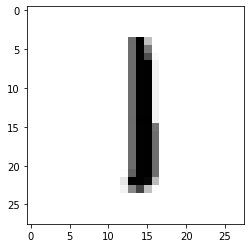

In [4]:
data.reshape([28,28])
plt.imshow(data,cmap='gray_r')

In [0]:
def build_model():
  tf.reset_default_graph()
  net = tflearn.input_data([None,784])
  net = tflearn.fully_connected(net,n_units=128,activation='ReLU')
  net = tflearn.fully_connected(net,n_units=32,activation='ReLU')
  net = tflearn.fully_connected(net,n_units=10,activation='softmax')
  net = tflearn.regression(net,optimizer='sgd',learning_rate=0.1,loss='categorical_crossentropy')
  model = tflearn.DNN(net)
  return model


In [0]:
model = build_model()

In [25]:
model.fit(X_train,Y_train,validation_set=0.1,show_metric=True,batch_size=100,n_epoch=20)

Training Step: 19799  | total loss: 0.52407 | time: 3.050s
| SGD | epoch: 040 | loss: 0.52407 - acc: 0.9657 -- iter: 49400/49500
Training Step: 19800  | total loss: 0.47305 | time: 4.083s
| SGD | epoch: 040 | loss: 0.47305 - acc: 0.9691 | val_loss: 0.03820 - val_acc: 0.9878 -- iter: 49500/49500
--


In [26]:
predictions = np.array(model.predict(X_test)).argmax(axis=1)
actual = Y_test.argmax(axis=1)
test_accuracy = np.mean(predictions == actual, axis=0)
print("Test accuracy: ", test_accuracy)

Test accuracy:  0.9767


In [31]:
Y_train[:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [32]:
print(X_train.shape,Y_train.shape)

(55000, 784) (55000, 10)


In [0]:
test = pd.read_csv('/content/drive/My Drive/mnist/test.csv')

In [0]:
predictions = np.array(model.predict(test))

In [37]:
predictions.shape

(28000, 10)

In [0]:
predictions = predictions.argmax(axis=1)

In [0]:
pred.to_csv('/content/drive/My Drive/mnist/output.csv',columns=['Label'],index=True,index_label='ImageId')

In [0]:
pred.index = pred.index+1

In [57]:
pred.index

RangeIndex(start=1, stop=28001, step=1)